# Investment Analysis Assignment
### By Nanda Kumar M R

## Checkpoint 1: Data Cleaning 1

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import re
import chardet

In [2]:
#checking the encoding format of the files

In [3]:
with open("companies.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read(5000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [4]:
with open("rounds2.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read(5000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [5]:
# referred the stackoverflow link mentioned in the problem description for encoding.
companies_df=pd.read_csv("companies.csv",encoding='ANSI')

In [6]:
rounds2_df=pd.read_csv("rounds2.csv",encoding='ANSI')

In [7]:
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


#### Lower case convertion of permalink & company_permalink column from companies_df & rounds2_df to be in a same format for comparision

In [9]:
companies_df['permalink'] = companies_df['permalink'].str.lower()

In [10]:
rounds2_df['company_permalink'] = rounds2_df['company_permalink'].str.lower() 

In [11]:
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


#### How many unique companies are present in rounds2

In [13]:
rounds2_df.company_permalink.nunique()

66368

#### How many unique companies are present in the companies file?

In [14]:
companies_df.permalink.nunique()

66368

#### In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

In [15]:
#Checking for the properties of primary key: Not Null and Unique for all records

In [16]:
companies_df.info() #Only permalink and status column have values for all 66368 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [17]:
companies_df.nunique()  #Only permalink column have unique values for all 66368 rows

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [18]:
companies_df['permalink'].head()  # Hence permalink column is the Unique ID of company

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
4         /organization/004-technologies
Name: permalink, dtype: object

#### Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [19]:
rounds2_df_unique = pd.DataFrame(rounds2_df.company_permalink.unique(),columns=["company_permalink_unique"])

In [20]:
companies_df_unique = pd.DataFrame(companies_df.permalink.unique(),columns=["permalink_unique"])

In [21]:
rounds2_df_unique.company_permalink_unique.isin(companies_df_unique.permalink_unique).astype(int).sum()

66368

#### Yes, On further analyis we could see that all company permalink data is present in both rounds2 and companies dataframe

In [22]:
rounds2_df_unique[~rounds2_df_unique['company_permalink_unique'].isin(companies_df_unique ['permalink_unique'])]

,company_permalink_unique


#### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [23]:
master_frame = rounds2_df.merge(companies_df,how='left',left_on=['company_permalink'],right_on=['permalink'] )


In [24]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [25]:
companies_df.shape

(66368, 10)

In [26]:
rounds2_df.shape

(114949, 6)

In [27]:
master_frame.shape

(114949, 16)

## Checkpoint 2: Funding Type Analysis

In [28]:
print(master_frame['funding_round_type'].unique())

['venture' 'seed' 'undisclosed' 'equity_crowdfunding' 'convertible_note'
 'private_equity' 'debt_financing' 'angel' 'grant' 'secondary_market'
 'post_ipo_equity' 'post_ipo_debt' 'product_crowdfunding'
 'non_equity_assistance']


In [29]:
selected_funding_types = ['venture','angel','seed','private_equity']
selected_funds_master_frame = master_frame[(master_frame['funding_round_type']==selected_funding_types[0])|(master_frame['funding_round_type']==selected_funding_types[1])|(master_frame['funding_round_type']==selected_funding_types[2])|(master_frame['funding_round_type']==selected_funding_types[3])]

#### Checking null values in raised_amount_usd column

In [30]:
master_frame.raised_amount_usd.isnull().sum()

19990

In [31]:
print("count of nulls values of investments by funding type:")
selected_funds_master_frame[selected_funds_master_frame['raised_amount_usd'].isnull()].groupby(by='funding_round_type').agg({'funding_round_type':['count']})

count of nulls values of investments by funding type:


,funding_round_type
,count
funding_round_type,
angel,1234
private_equity,349
seed,6921
venture,5266


#### To understand the distribution better, plotting box plot for each funding_round_type

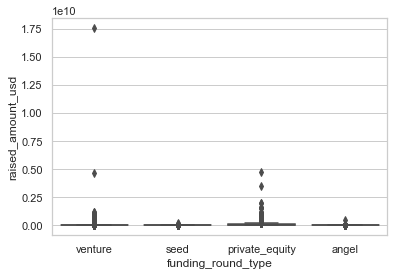

In [32]:
sns.set(style="whitegrid")
boxplot_1 = sns.boxplot(x=selected_funds_master_frame.funding_round_type, y=selected_funds_master_frame.raised_amount_usd)
boxplot_1

#### As in the previous plot  we couldn't get much insights hence  for better understanding of the distribution, using distplot for each funding_round_type

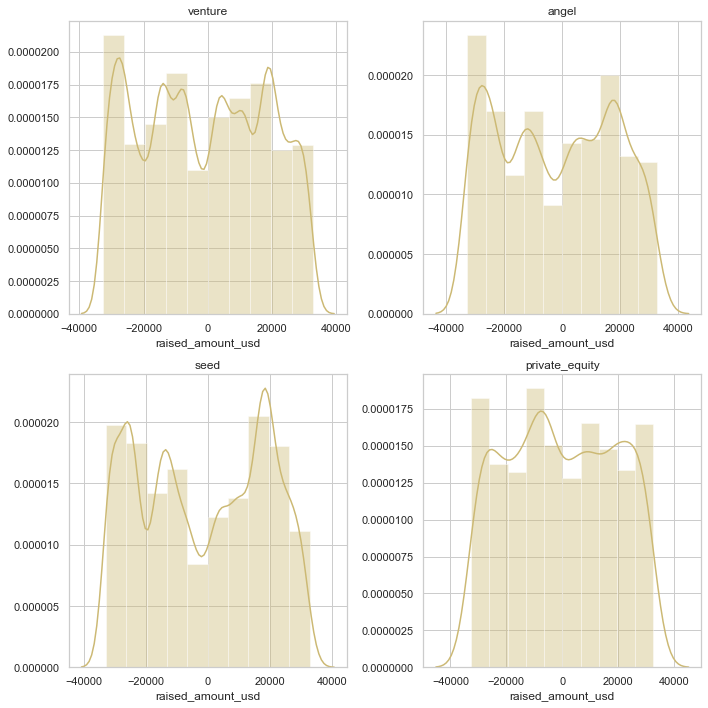

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(10, 10))
for i, ax in zip(range(0,len(selected_funding_types)), axes.flat):
    funding = selected_funds_master_frame[selected_funds_master_frame['funding_round_type']==selected_funding_types[i]]
    funding = funding[~funding['raised_amount_usd'].isnull()]
    x = funding['raised_amount_usd'].astype(np.int16)
    sns.distplot(x,bins=10,ax=ax,color="y")
    ax.title.set_text(selected_funding_types[i])
    
plt.tight_layout()
plt.show()

#### From the above plots we could see that there are presence of outliers in the data. 
#### So Median is more suitable value to fill the null values 
#### Hence using median of the funding type by country to impute the values, it is the most representative value of distribution

In [34]:
median_copy = selected_funds_master_frame
median_copy = median_copy.groupby(['funding_round_type', 'country_code']).median()

In [35]:
median_copy.reset_index(inplace=True)

In [36]:
median_copy

,funding_round_type,country_code,raised_amount_usd
0,angel,ARE,400000.0
1,angel,ARG,123220.0
2,angel,AUS,626562.0
3,angel,AUT,500000.0
4,angel,BEL,694895.0
...,...,...,...
362,venture,UKR,1500000.0
363,venture,URY,1500000.0
364,venture,USA,5000000.0
365,venture,VNM,3500000.0


In [37]:
#Null Records and Not Null Records
null_investment_records_df = selected_funds_master_frame[selected_funds_master_frame.raised_amount_usd.isnull()]
investment_records_df = selected_funds_master_frame[selected_funds_master_frame.raised_amount_usd.notnull()]

In [38]:
imputed_null_df = null_investment_records_df.merge(median_copy, on= ['funding_round_type','country_code'] ,how = 'left')
#Normalizing and concatenating the imputed nulls and not null records together
imputed_null_df = imputed_null_df.drop(columns= ['raised_amount_usd_x'])
imputed_null_df = imputed_null_df.rename(columns= {"raised_amount_usd_y" : "raised_amount_usd"} )
imputed_master_df = pd.concat([investment_records_df,imputed_null_df])
warnings.filterwarnings("ignore")
imputed_master_df.head()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,category_list,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,permalink,raised_amount_usd,region,state_code,status
0,Media,Mumbai,/organization/-fame,IND,NaN,05-01-2015,B,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,http://livfame.com,#fame,/organization/-fame,10000000.0,Mumbai,16,operating
2,Application Platforms|Real Time|Social Network...,Delaware City,/organization/-qounter,USA,04-09-2014,01-03-2014,NaN,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,http://www.qounter.com,:Qounter,/organization/-qounter,700000.0,DE - Other,DE,operating
3,Apps|Games|Mobile,NaN,/organization/-the-one-of-them-inc-,NaN,NaN,30-01-2014,B,/funding-round/650b8f704416801069bb178a1418776b,venture,http://oneofthem.jp,"(THE) ONE of THEM,Inc.",/organization/-the-one-of-them-inc-,3406878.0,NaN,NaN,operating
4,Curated Web,Beijing,/organization/0-6-com,CHN,01-01-2007,19-03-2008,A,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,http://www.0-6.com,0-6.com,/organization/0-6-com,2000000.0,Beijing,22,operating
7,Biotechnology,Vancouver,/organization/0ndine-biomedical-inc,CAN,01-01-1997,11-09-2009,NaN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,http://ondinebio.com,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,43360.0,Vancouver,BC,operating


In [39]:
imputed_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94397 entries, 0 to 13769
Data columns (total 16 columns):
category_list              91900 non-null object
city                       85841 non-null object
company_permalink          94397 non-null object
country_code               87076 non-null object
founded_at                 77678 non-null object
funded_at                  94397 non-null object
funding_round_code         31120 non-null object
funding_round_permalink    94397 non-null object
funding_round_type         94397 non-null object
homepage_url               90252 non-null object
name                       94396 non-null object
permalink                  94397 non-null object
raised_amount_usd          92078 non-null float64
region                     85838 non-null object
state_code                 85118 non-null object
status                     94397 non-null object
dtypes: float64(1), object(15)
memory usage: 12.2+ MB


#### Checking the distribution of data has not changed as most of the nulls in the investment amount are filled with respective Median values

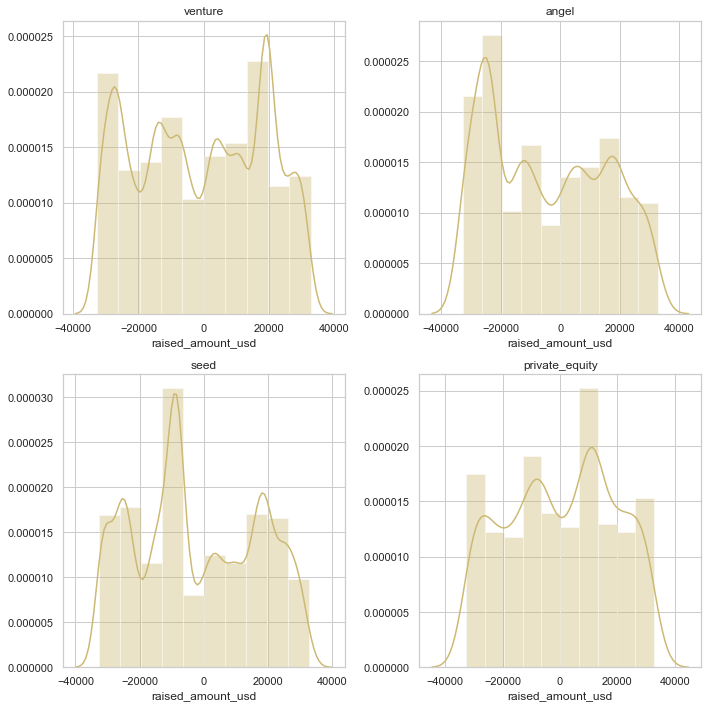

In [40]:
df =imputed_master_df
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(10, 10))
warnings.filterwarnings("ignore")
for i, ax in zip(range(0,len(selected_funding_types)), axes.flat):
    funding = df[df['funding_round_type']==selected_funding_types[i]]
    funding = funding[~funding['raised_amount_usd'].isnull()]
    x = funding['raised_amount_usd'].astype(np.int16)
    sns.distplot(x,bins=10,ax=ax, color="y")
    ax.title.set_text(selected_funding_types[i])
    
plt.tight_layout()
plt.show()

In [41]:
imputed_selected_funds_master_frame =df
investment_by_funding_type_grouped =imputed_selected_funds_master_frame.groupby(['funding_round_type'])
investment_by_funding_type = investment_by_funding_type_grouped.agg({'raised_amount_usd': ['mean','median','max','min','count']})
investment_by_funding_type.sort_values(by=[('raised_amount_usd','mean')],ascending = False)
investment_by_funding_type

raised_amount_usd                                      
                                mean      median           max  min  count
funding_round_type                                                        
angel                   8.686541e+05    450000.0  4.945120e+08  0.0   5905
private_equity          6.750296e+07  19999999.5  4.745460e+09  0.0   2207
seed                    6.553549e+05    357000.0  2.000000e+08  0.0  29237
venture                 1.122720e+07   5000000.0  1.760000e+10  0.0  54729

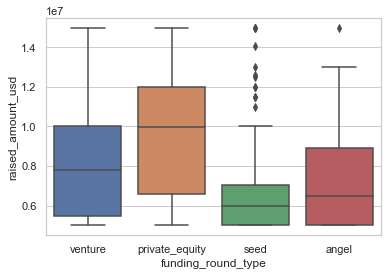

In [42]:
# checking the distribution of investments per round having values between 5 to 15 million
investment_limit_lower = 5000000
investment_limit_upper = 15000000
funds_master_frame=imputed_selected_funds_master_frame[(imputed_selected_funds_master_frame['raised_amount_usd']>=investment_limit_lower)&(imputed_selected_funds_master_frame['raised_amount_usd']<=investment_limit_upper)]
sns.set(style="whitegrid")
boxplot_2 = sns.boxplot(x=funds_master_frame.funding_round_type, y=funds_master_frame.raised_amount_usd)
boxplot_2

In [43]:
#After imputting values
for fund_type in selected_funding_types:
    print(fund_type,end=': ')
    print( investment_by_funding_type.loc[fund_type,('raised_amount_usd','mean')])

venture: 11227199.209916132
angel: 868654.101100762
seed: 655354.8834011698
private_equity: 67502962.62641595


In [44]:
#Before imputting values
nonimputed_investment_by_funding_type_grouped =selected_funds_master_frame.groupby(['funding_round_type'])
nonimputed_investment_by_funding_type = nonimputed_investment_by_funding_type_grouped.agg({'raised_amount_usd': ['mean','median','max','min','count']})
nonimputed_investment_by_funding_type.sort_values(by=[('raised_amount_usd','mean')],ascending = False)
nonimputed_investment_by_funding_type

raised_amount_usd                                      
                                mean      median           max  min  count
funding_round_type                                                        
angel                   9.586945e+05    400000.0  4.945120e+08  0.0   4860
private_equity          7.330859e+07  20000000.0  4.745460e+09  0.0   1936
seed                    7.198180e+05    275000.0  2.000000e+08  0.0  23603
venture                 1.174895e+07   5000000.0  1.760000e+10  0.0  50228

In [45]:
#Before imputting values
for fund_type in selected_funding_types:
    print(fund_type,end=': ')
    print( nonimputed_investment_by_funding_type.loc[fund_type,('raised_amount_usd','mean')])

venture: 11748949.129489528
angel: 958694.4697530865
seed: 719817.9969071728
private_equity: 73308593.02944215


#### Going by the mean values of investment in USD (before and after imputting values), only the overall mean of venture funding type lies within 5 to 15 million USD per investment round and it has dense distribution in the range of 5-15 million USD

### Checkpoint 3: Country Analysis

In [46]:
chosen_investment_type = 'venture'
# taking only the venture investment from imputed_selected_funds_master_frame
selected_master_frame = imputed_selected_funds_master_frame[imputed_selected_funds_master_frame['funding_round_type']==chosen_investment_type]
print("Selected investment type:", selected_master_frame['funding_round_type'].unique())
print("Counties for chosen investment type:",selected_master_frame['country_code'].unique())

Selected investment type: ['venture']
Counties for chosen investment type: ['IND' nan 'CHN' 'CAN' 'USA' 'GBR' 'FRA' 'ROM' 'KOR' 'IRL' 'SWE' 'SGP'
 'NLD' 'RUS' 'BEL' 'ESP' 'HUN' 'JPN' 'DEU' 'ITA' 'HKG' 'BRA' 'FIN' 'CHE'
 'PRT' 'SVN' 'THA' 'DNK' 'TWN' 'ISR' 'NOR' 'LTU' 'ISL' 'MEX' 'AUS' 'NZL'
 'AUT' 'ARG' 'PHL' 'MNE' 'MYS' 'TUR' 'POL' 'LVA' 'GGY' 'EST' 'LBN' 'GRC'
 'IDN' 'CYP' 'SVK' 'ARE' 'EGY' 'ARM' 'ZAF' 'TUN' 'KEN' 'COL' 'CZE' 'CMR'
 'PRI' 'CYM' 'PER' 'ECU' 'CHL' 'NGA' 'VNM' 'URY' 'PAK' 'HRV' 'LUX' 'UKR'
 'BMU' 'MUS' 'BGR' 'TTO' 'PAN' 'MMR' 'JOR' 'KAZ' 'MAR' 'LIE' 'GTM' 'SAU'
 'TAN' 'KNA' 'SEN' 'MLT' 'MCO' 'BAH' 'GHA' 'KWT' 'UGA' 'LAO' 'BGD' 'BWA'
 'MAF' 'GIB' 'PSE' 'CRI' 'RWA' 'MOZ' 'MKD' 'BHR']


In [47]:
# raised_amount_usd by country for the venture investment
investment_by_country = selected_master_frame.groupby(['country_code'])
investment_by_country = investment_by_country.agg({'raised_amount_usd': ['sum','max','min','count']})
investment_by_country = investment_by_country.sort_values(by=[('raised_amount_usd','sum')],ascending = False)
investment_by_country.head()

raised_amount_usd                              
                           sum           max      min  count
country_code                                                
USA               4.336758e+11  1.760000e+10      0.0  38372
CHN               4.506542e+10  1.100000e+09  20000.0   2087
GBR               2.131203e+10  9.150000e+08      0.0   2303
IND               1.565186e+10  1.000000e+09      0.0    992
CAN               9.943332e+09  1.650000e+08   4697.0   1346

#### 1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

#### 2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [48]:
# choosing top 9 by total sum of investment amount
top9= investment_by_country.nlargest(9,[('raised_amount_usd','sum')])

In [49]:
top9

raised_amount_usd                              
                           sum           max      min  count
country_code                                                
USA               4.336758e+11  1.760000e+10      0.0  38372
CHN               4.506542e+10  1.100000e+09  20000.0   2087
GBR               2.131203e+10  9.150000e+08      0.0   2303
IND               1.565186e+10  1.000000e+09      0.0    992
CAN               9.943332e+09  1.650000e+08   4697.0   1346
DEU               7.599332e+09  1.701774e+08      0.0    786
FRA               7.524737e+09  5.000000e+08  30488.0    985
ISR               7.477515e+09  1.500000e+08      6.0    910
JPN               3.541877e+09  2.360000e+08  14542.0    318

#### With the comparision of provided resource (List of countries and territories where English is an official language) and top9 dataframe countires 
- USA, GBR and IND are the top 3 countries where English is a de facto official language
- CHN is not found in the list

### Checkpoint 4: Sector Analysis 1

In [50]:
with open("mapping.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read(5000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [51]:
sector_mapping_df = pd.read_csv("mapping.csv", encoding="ANSI")
sector_mapping_df

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [52]:
# checked No category belong to more than 1 main category
print(sector_mapping_df[sector_mapping_df.sum(axis=1)>1])

Empty DataFrame
Columns: [category_list, Automotive & Sports, Blanks, Cleantech / Semiconductors, Entertainment, Health, Manufacturing, News, Search and Messaging, Others, Social, Finance, Analytics, Advertising]
Index: []


In [53]:
# main category wise the count of sub categories present
print(sector_mapping_df.sum(axis=0))


Automotive & Sports                         22
Blanks                                       1
Cleantech / Semiconductors                  53
Entertainment                               89
Health                                      63
Manufacturing                               40
News, Search and Messaging                  72
Others                                     195
Social, Finance, Analytics, Advertising    153
dtype: int64


In [54]:
selected_master_frame.dtypes

category_list               object
city                        object
company_permalink           object
country_code                object
founded_at                  object
funded_at                   object
funding_round_code          object
funding_round_permalink     object
funding_round_type          object
homepage_url                object
name                        object
permalink                   object
raised_amount_usd          float64
region                      object
state_code                  object
status                      object
dtype: object

In [55]:
# correcting the dtypes
selected_master_frame.astype({
    'company_permalink': 'str',
    'funding_round_permalink': 'str',
    'funding_round_type': 'str',
    'funding_round_code': 'str',
   'funded_at':'datetime64[ns]',
    'category_list':'str',
    'status':'str',
    'country_code':'str',
'state_code':'str',
'region':'str',
'city':'str',
'founded_at':'str'   
}).dtypes

category_list                      object
city                               object
company_permalink                  object
country_code                       object
founded_at                         object
funded_at                  datetime64[ns]
funding_round_code                 object
funding_round_permalink            object
funding_round_type                 object
homepage_url                       object
name                               object
permalink                          object
raised_amount_usd                 float64
region                             object
state_code                         object
status                             object
dtype: object

In [56]:
selected_master_frame.head()

,category_list,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,permalink,raised_amount_usd,region,state_code,status
0,Media,Mumbai,/organization/-fame,IND,NaN,05-01-2015,B,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,http://livfame.com,#fame,/organization/-fame,10000000.0,Mumbai,16,operating
3,Apps|Games|Mobile,NaN,/organization/-the-one-of-them-inc-,NaN,NaN,30-01-2014,B,/funding-round/650b8f704416801069bb178a1418776b,venture,http://oneofthem.jp,"(THE) ONE of THEM,Inc.",/organization/-the-one-of-them-inc-,3406878.0,NaN,NaN,operating
4,Curated Web,Beijing,/organization/0-6-com,CHN,01-01-2007,19-03-2008,A,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,http://www.0-6.com,0-6.com,/organization/0-6-com,2000000.0,Beijing,22,operating
8,Biotechnology,Vancouver,/organization/0ndine-biomedical-inc,CAN,01-01-1997,21-12-2009,NaN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,http://ondinebio.com,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,719491.0,Vancouver,BC,operating
10,Analytics,Mountain View,/organization/0xdata,USA,01-01-2011,09-11-2015,B,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,http://h2o.ai/,H2O.ai,/organization/0xdata,20000000.0,SF Bay Area,CA,operating


In [57]:
primary_category_fn = lambda category_list: str(category_list).split('|')[0]
selected_master_frame['primary_sector'] = selected_master_frame['category_list'].apply(primary_category_fn)
selected_master_frame[['category_list','primary_sector']].head()

,category_list,primary_sector
0,Media,Media
3,Apps|Games|Mobile,Apps
4,Curated Web,Curated Web
8,Biotechnology,Biotechnology
10,Analytics,Analytics


In [58]:
# reforming mapping df
sector_mapping_df_melted = sector_mapping_df.melt(id_vars="category_list",var_name="main_sector")
sector_mapping_df_melted = sector_mapping_df_melted[sector_mapping_df_melted["value"]>0]
sector_mapping_df_melted=sector_mapping_df_melted.drop(columns="value")
sector_mapping_df_melted.category_list.unique()

array(['Adventure Travel', 'Aerospace', 'Auto', 'Automated Kiosk',
       'Automotive', 'Bicycles', 'Boating Industry', 'CAD', 'Cars',
       'Design', 'Designers', 'Drones', 'Electric Vehicles', 'Fuels',
       'Heavy Industry', 'Industrial Automation', 'Limousines', 'Soccer',
       'Sporting Goods', 'Sports', 'Transportation',
       'Unmanned Air Systems', nan, 'Air Pollution Control',
       'Aquaculture', 'Bio-Pharm', 'Biofuels', 'Bioinformatics',
       'Biomass Power Generation', 'Biometrics', 'Biotechnology',
       'Bitcoin', 'Carbon', 'Chemicals', 'Clean Energy',
       'Clean Technology', 'Clean Technology IT', 'Commercial Solar',
       'Commodities', 'Concentrated Solar Power', 'Disruptive Models',
       'Early-Stage Technology', 'Energy', 'Energy Efficiency',
       'Energy IT', 'Energy Ma0gement', 'Energy Storage',
       'Environmental Innovation', 'Fertility', 'Fuel Cells',
       'Funeral Industry', 'Gas', 'Green', 'Green Consumer Goods',
       'Home & Garden', 'Ho

In [59]:
#As observed in the category list in place of string 'na' in the words, '0' can be seen 
# correction: As values like Enterprise 2.0 also contains 0, using regular expression
correction = lambda x: str(x).replace("0","na") if (re.search("[^0-9\.]0",str(x)) != None)  or (re.search("\d\.0",str(x)) == None) else str(x)
sector_mapping_df_melted['category_list'] = sector_mapping_df_melted['category_list'].apply(correction).str.lower()
sector_mapping_df_melted['category_list'].unique()

array(['adventure travel', 'aerospace', 'auto', 'automated kiosk',
       'automotive', 'bicycles', 'boating industry', 'cad', 'cars',
       'design', 'designers', 'drones', 'electric vehicles', 'fuels',
       'heavy industry', 'industrial automation', 'limousines', 'soccer',
       'sporting goods', 'sports', 'transportation',
       'unmanned air systems', 'nan', 'air pollution control',
       'aquaculture', 'bio-pharm', 'biofuels', 'bioinformatics',
       'biomass power generation', 'biometrics', 'biotechnology',
       'bitcoin', 'carbon', 'chemicals', 'clean energy',
       'clean technology', 'clean technology it', 'commercial solar',
       'commodities', 'concentrated solar power', 'disruptive models',
       'early-stage technology', 'energy', 'energy efficiency',
       'energy it', 'energy management', 'energy storage',
       'environmental innovation', 'fertility', 'fuel cells',
       'funeral industry', 'gas', 'green', 'green consumer goods',
       'home & garden', 

In [60]:
selected_master_frame['primary_sector']= selected_master_frame['primary_sector'].str.lower()
master_frame_with_main_sector = selected_master_frame.merge(sector_mapping_df_melted,how='left',left_on='primary_sector',right_on='category_list',suffixes=('_frm_master','_frm_mapping'))

In [61]:
master_frame_with_main_sector.head()

,category_list_frm_master,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,permalink,raised_amount_usd,region,state_code,status,primary_sector,category_list_frm_mapping,main_sector
0,Media,Mumbai,/organization/-fame,IND,NaN,05-01-2015,B,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,http://livfame.com,#fame,/organization/-fame,10000000.0,Mumbai,16,operating,media,media,Entertainment
1,Apps|Games|Mobile,NaN,/organization/-the-one-of-them-inc-,NaN,NaN,30-01-2014,B,/funding-round/650b8f704416801069bb178a1418776b,venture,http://oneofthem.jp,"(THE) ONE of THEM,Inc.",/organization/-the-one-of-them-inc-,3406878.0,NaN,NaN,operating,apps,apps,"News, Search and Messaging"
2,Curated Web,Beijing,/organization/0-6-com,CHN,01-01-2007,19-03-2008,A,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,http://www.0-6.com,0-6.com,/organization/0-6-com,2000000.0,Beijing,22,operating,curated web,curated web,"News, Search and Messaging"
3,Biotechnology,Vancouver,/organization/0ndine-biomedical-inc,CAN,01-01-1997,21-12-2009,NaN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,http://ondinebio.com,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,719491.0,Vancouver,BC,operating,biotechnology,biotechnology,Cleantech / Semiconductors
4,Analytics,Mountain View,/organization/0xdata,USA,01-01-2011,09-11-2015,B,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,http://h2o.ai/,H2O.ai,/organization/0xdata,20000000.0,SF Bay Area,CA,operating,analytics,analytics,"Social, Finance, Analytics, Advertising"


In [62]:
master_frame_with_main_sector[(master_frame_with_main_sector['main_sector'].isnull())]['primary_sector'].unique()

array(['english-speaking', 'enterprise hardware', 'natural gas uses',
       'adaptive equipment', 'racing', 'specialty retail', 'nightlife',
       'biotechnology and semiconductor', 'rapidly expanding',
       'product search', 'greentech', 'retirement'], dtype=object)

In [63]:
#Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).
master_frame_with_main_sector
master_frame_with_main_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 55493
Data columns (total 19 columns):
category_list_frm_master     54362 non-null object
city                         51940 non-null object
company_permalink            55494 non-null object
country_code                 52619 non-null object
founded_at                   44303 non-null object
funded_at                    55494 non-null object
funding_round_code           30985 non-null object
funding_round_permalink      55494 non-null object
funding_round_type           55494 non-null object
homepage_url                 52549 non-null object
name                         55494 non-null object
permalink                    55494 non-null object
raised_amount_usd            54729 non-null float64
region                       51940 non-null object
state_code                   51698 non-null object
status                       55494 non-null object
primary_sector               55494 non-null object
category_list_frm_mappi

### Checkpoint 5: Sector Analysis 2

In [64]:
# Initializing variables based on previous answers
Country_1 = 'USA'
Country_2 = 'GBR'
Country_3 = 'IND'
selected_countries = [Country_1,Country_2,Country_3]
FT = 'venture'
Range_lower = 5000000
Range_upper = 15000000

In [65]:
c5_master_frame = master_frame_with_main_sector[(master_frame_with_main_sector['country_code'] == Country_1) | (master_frame_with_main_sector['country_code'] == Country_2) | (master_frame_with_main_sector['country_code'] == Country_3)]
c5_master_frame = c5_master_frame[c5_master_frame['funding_round_type']== FT]
c5_master_frame = c5_master_frame[(c5_master_frame['raised_amount_usd']>=Range_lower) & (c5_master_frame['raised_amount_usd']<=Range_upper)]

In [66]:
# verifying
print(c5_master_frame['country_code'].unique())
print(c5_master_frame['funding_round_type'].unique())
c5_master_frame['raised_amount_usd'].describe()

['IND' 'USA' 'GBR']
['venture']


count    1.550900e+04
mean     8.341591e+06
std      3.142307e+06
min      5.000000e+06
25%      5.250000e+06
50%      7.500000e+06
75%      1.015000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [67]:
investment_by_sectors = c5_master_frame.groupby(by=['country_code','main_sector'])
investment_by_sectors =investment_by_sectors.agg({'raised_amount_usd': ['sum','count','mean','max','min']})
investment_by_sectors.sort_values(by=[('raised_amount_usd','sum')],ascending=False)

raised_amount_usd        \
                                                                   sum count   
country_code main_sector                                                       
USA          Others                                       2.858601e+10  3403   
             Social, Finance, Analytics, Advertising      2.668738e+10  3290   
             Cleantech / Semiconductors                   2.299343e+10  2622   
             News, Search and Messaging                   1.528157e+10  1845   
             Health                                       8.931859e+09  1053   
             Manufacturing                                8.208553e+09   989   
             Entertainment                                5.764198e+09   724   
             Automotive & Sports                          1.759104e+09   228   
             Blanks                                       1.474763e+09   228   
IND          Others                                       1.373410e+09   158   
GBR          Others                                       1.283624e+09   147   
             Cleantech / Semiconductors                   1.163990e+09   130   
             Social, Finance, Analytics, Advertising      1.089404e+09   133   
IND          Social, Finance, Analytics, Advertising      8.955496e+08   106   
GBR          News, Search and Messaging                   6.157462e+08    73   
IND          News, Search and Messaging                   6.138345e+08    76   
GBR          Entertainment                                4.827847e+08    56   
IND          Entertainment                                3.858300e+08    47   
GBR          Manufacturing                                3.619403e+08    42   
IND          Health                                       2.727400e+08    33   
             Manufacturing                                2.684000e+08    30   
             Cleantech / Semiconductors                   2.328800e+08    29   
GBR          Health                                       2.145375e+08    24   
             Automotive & Sports                          1.670516e+08    16   
IND          Automotive & Sports                          1.444000e+08    14   
GBR          Blanks                                       5.776485e+07     7   
IND          Blanks                                       4.950000e+07     5   

                                                                    \
                                                              mean   
country_code main_sector                                             
USA          Others                                   8.400237e+06   
             Social, Finance, Analytics, Advertising  8.111665e+06   
             Cleantech / Semiconductors               8.769424e+06   
             News, Search and Messaging               8.282692e+06   
             Health                                   8.482298e+06   
             Manufacturing                            8.299852e+06   
             Entertainment                            7.961599e+06   
             Automotive & Sports                      7.715370e+06   
             Blanks                                   6.468260e+06   
IND          Others                                   8.692465e+06   
GBR          Others                                   8.732138e+06   
             Cleantech / Semiconductors               8.953770e+06   
             Social, Finance, Analytics, Advertising  8.191008e+06   
IND          Social, Finance, Analytics, Advertising  8.448581e+06   
GBR          News, Search and Messaging               8.434880e+06   
IND          News, Search and Messaging               8.076770e+06   
GBR          Entertainment                            8.621155e+06   
IND          Entertainment                            8.209149e+06   
GBR          Manufacturing                            8.617627e+06   
IND          Health                                   8.264848e+06   
             Manufacturing                

#### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [68]:
# D1
# country_1 = 'USA'
usa_df = c5_master_frame[c5_master_frame['country_code']=='USA']
#count and sum by main sector
usa_agg = usa_df.groupby('main_sector').agg({"raised_amount_usd": ["count","sum"]}).sort_values(("raised_amount_usd","sum"), ascending = False)
usa_agg

raised_amount_usd              
                                                    count           sum
main_sector                                                            
Others                                               3403  2.858601e+10
Social, Finance, Analytics, Advertising              3290  2.668738e+10
Cleantech / Semiconductors                           2622  2.299343e+10
News, Search and Messaging                           1845  1.528157e+10
Health                                               1053  8.931859e+09
Manufacturing                                         989  8.208553e+09
Entertainment                                         724  5.764198e+09
Automotive & Sports                                   228  1.759104e+09
Blanks                                                228  1.474763e+09

In [69]:
D1 = usa_df.merge(usa_agg,how='left', on='main_sector')
D1.rename(columns = {('raised_amount_usd', 'count'):'total_no_of_investment_by_sector',
                    ('raised_amount_usd', 'sum'): 'total_amount_invested_by_sector'}, inplace = True)
D1

,category_list_frm_master,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,...,permalink,raised_amount_usd,region,state_code,status,primary_sector,category_list_frm_mapping,main_sector,total_no_of_investment_by_sector,total_amount_invested_by_sector
0,Analytics,Mountain View,/organization/0xdata,USA,01-01-2011,19-07-2014,A,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,http://h2o.ai/,...,/organization/0xdata,8900000.0,SF Bay Area,CA,operating,analytics,analytics,"Social, Finance, Analytics, Advertising",3290.0,2.668738e+10
1,Apps|Cable|Distribution|Software,Cupertino,/organization/1-mainstream,USA,01-03-2012,17-03-2015,NaN,/funding-round/b952cbaf401f310927430c97b68162ea,venture,http://www.1mainstream.com,...,/organization/1-mainstream,5000000.0,SF Bay Area,CA,acquired,apps,apps,"News, Search and Messaging",1845.0,1.528157e+10
2,Service Providers|Technology,Burlington,/organization/128-technology,USA,07-07-2014,16-12-2014,NaN,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,http://www.128technology.com/,...,/organization/128-technology,11999347.0,Boston,MA,operating,service providers,service providers,Others,3403.0,2.858601e+10
3,Manufacturing,Bedford,/organization/1366-technologies,USA,01-01-2007,15-10-2013,C,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,http://www.1366tech.com,...,/organization/1366-technologies,15000000.0,Boston,MA,operating,manufacturing,manufacturing,Manufacturing,989.0,8.208553e+09
4,Manufacturing,Bedford,/organization/1366-technologies,USA,01-01-2007,09-04-2015,C,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,http://www.1366tech.com,...,/organization/1366-technologies,5000000.0,Boston,MA,operating,manufacturing,manufacturing,Manufacturing,989.0,8.208553e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14378,Biotechnology,Louisville,/organization/zirmed,USA,01-01-1999,10-12-2010,NaN,/funding-round/f15908885098a0b48317f02d5d543be0,venture,http://zirmed.com,...,/organization/zirmed,5000000.0,Louisville,KY,operating,biotechnology,biotechnology,Cleantech / Semiconductors,2622.0,2.299343e+10
14379,Cars|Parking,San Francisco,/organization/zirx,USA,01-03-2014,02-09-2015,NaN,/funding-round/85e0be1b869512ca822d9a661cc8cf42,venture,http://zirx.com,...,/organization/zirx,5000000.0,SF Bay Area,CA,operating,cars,cars,Automotive & Sports,228.0,1.759104e+09
14380,E-Commerce|Online Shopping,Sunnyvale,/organization/zoomvy,USA,01-01-2013,14-05-2014,A,/funding-round/88756cdd3a8e4cbd7140f024a558df34,venture,http://www.zoomvy.com,...,/organization/zoomvy,5000000.0,TX - Other,TX,operating,e-commerce,e-commerce,Others,3403.0,2.858601e+10
14381,Home Automation|Internet of Things|Mobile Soft...,San Francisco,/organization/zuli,USA,01-01-2012,01-03-2015,NaN,/funding-round/d8bc314557d49d0bc43a642438fe0b06,venture,http://www.zuli.io,...,/organization/zuli,5000000.0,SF Bay Area,CA,operating,home automation,home automation,Cleantech / Semiconductors,2622.0,2.299343e+10


In [70]:
# D2
# country_2 = 'GBR'
gbr_df = c5_master_frame[c5_master_frame['country_code']=='GBR']
#count and sum by main sector
gbr_agg = gbr_df.groupby('main_sector').agg({"raised_amount_usd": ["count","sum"]}).sort_values(("raised_amount_usd","sum"), ascending = False)
gbr_agg

raised_amount_usd              
                                                    count           sum
main_sector                                                            
Others                                                147  1.283624e+09
Cleantech / Semiconductors                            130  1.163990e+09
Social, Finance, Analytics, Advertising               133  1.089404e+09
News, Search and Messaging                             73  6.157462e+08
Entertainment                                          56  4.827847e+08
Manufacturing                                          42  3.619403e+08
Health                                                 24  2.145375e+08
Automotive & Sports                                    16  1.670516e+08
Blanks                                                  7  5.776485e+07

In [71]:
D2 = gbr_df.merge(gbr_agg,how='left', on='main_sector')
D2.rename(columns = {('raised_amount_usd', 'count'):'total_no_of_investment_by_sector',
                    ('raised_amount_usd', 'sum'): 'total_amount_invested_by_sector'}, inplace = True)
D2

,category_list_frm_master,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,...,permalink,raised_amount_usd,region,state_code,status,primary_sector,category_list_frm_mapping,main_sector,total_no_of_investment_by_sector,total_amount_invested_by_sector
0,Android|Apps|iPhone|Mobile|Sports,London,/organization/365scores,GBR,01-01-2008,29-09-2014,B,/funding-round/48212f931f542fdef78810bc87aef086,venture,http://biz.365scores.com,...,/organization/365scores,5500000.0,London,H9,operating,android,android,"Social, Finance, Analytics, Advertising",133,1.089404e+09
1,Content Creators|Content Delivery|Licensing|Mu...,London,/organization/7digital,GBR,01-01-2004,01-01-2008,A,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,http://about.7digital.com,...,/organization/7digital,8468328.0,London,H9,acquired,content creators,content creators,Entertainment,56,4.827847e+08
2,Content Creators|Content Delivery|Licensing|Mu...,London,/organization/7digital,GBR,01-01-2004,19-10-2012,NaN,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,http://about.7digital.com,...,/organization/7digital,10000000.0,London,H9,acquired,content creators,content creators,Entertainment,56,4.827847e+08
3,Media|News|Publishing|Soccer|Sports,London,/organization/90min,GBR,01-01-2011,06-10-2015,NaN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,http://www.90min.com,...,/organization/90min,15000000.0,London,H9,operating,media,media,Entertainment,56,4.827847e+08
4,Media|News|Publishing|Soccer|Sports,London,/organization/90min,GBR,01-01-2011,07-05-2013,NaN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,http://www.90min.com,...,/organization/90min,5800000.0,London,H9,operating,media,media,Entertainment,56,4.827847e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Property Management|Real Estate,London,/organization/zoopla,GBR,01-06-2007,19-01-2009,B,/funding-round/98da1f441a55c9a9629a256828923e38,venture,http://www.zoopla.co.uk,...,/organization/zoopla,5440000.0,London,H9,ipo,property management,property management,"Social, Finance, Analytics, Advertising",133,1.089404e+09
624,Finance|FinTech,London,/organization/zopa,GBR,01-03-2005,20-03-2007,C,/funding-round/2a55d435c3433d8f903526c050c19361,venture,http://www.zopa.com,...,/organization/zopa,12900000.0,London,H9,operating,finance,finance,"Social, Finance, Analytics, Advertising",133,1.089404e+09
625,Finance|FinTech,London,/organization/zopa,GBR,01-03-2005,01-03-2006,B,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,http://www.zopa.com,...,/organization/zopa,15000000.0,London,H9,operating,finance,finance,"Social, Finance, Analytics, Advertising",133,1.089404e+09
626,Finance|FinTech,London,/organization/zopa,GBR,01-03-2005,01-07-2006,B,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,http://www.zopa.com,...,/organization/zopa,5000000.0,London,H9,operating,finance,finance,"Social, Finance, Analytics, Advertising",133,1.089404e+09


In [72]:
# D3
# country_2 = 'IND'
ind_df = c5_master_frame[c5_master_frame['country_code']=='IND']
#count and sum by main sector
ind_agg = ind_df.groupby('main_sector').agg({"raised_amount_usd": ["count","sum"]}).sort_values(("raised_amount_usd","sum"), ascending = False)
ind_agg

raised_amount_usd              
                                                    count           sum
main_sector                                                            
Others                                                158  1.373410e+09
Social, Finance, Analytics, Advertising               106  8.955496e+08
News, Search and Messaging                             76  6.138345e+08
Entertainment                                          47  3.858300e+08
Health                                                 33  2.727400e+08
Manufacturing                                          30  2.684000e+08
Cleantech / Semiconductors                             29  2.328800e+08
Automotive & Sports                                    14  1.444000e+08
Blanks                                                  5  4.950000e+07

In [73]:
D3 = ind_df.merge(ind_agg,how='left', on='main_sector')
D3.rename(columns = {('raised_amount_usd', 'count'):'total_no_of_investment_by_sector',
                    ('raised_amount_usd', 'sum'): 'total_amount_invested_by_sector'}, inplace = True)
D3

,category_list_frm_master,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,...,permalink,raised_amount_usd,region,state_code,status,primary_sector,category_list_frm_mapping,main_sector,total_no_of_investment_by_sector,total_amount_invested_by_sector
0,Media,Mumbai,/organization/-fame,IND,NaN,05-01-2015,B,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,http://livfame.com,...,/organization/-fame,10000000.0,Mumbai,16,operating,media,media,Entertainment,47,3.858300e+08
1,E-Commerce,Gurgaon,/organization/21diamonds-india,IND,01-06-2012,15-11-2012,C,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,http://www.21diamonds.de,...,/organization/21diamonds-india,6369507.0,New Delhi,10,operating,e-commerce,e-commerce,Others,158,1.373410e+09
2,Finance,Mumbai,/organization/a-little-world,IND,02-03-2000,09-09-2008,B,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,http://alittleworld.com,...,/organization/a-little-world,6410000.0,Mumbai,16,operating,finance,finance,"Social, Finance, Analytics, Advertising",106,8.955496e+08
3,Entertainment|Tourism,Khopoli,/organization/adlabs-imagica,IND,NaN,28-10-2014,NaN,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,http://www.adlabsimagica.com,...,/organization/adlabs-imagica,8180000.0,IND - Other,16,operating,entertainment,entertainment,Entertainment,47,3.858300e+08
4,Finance|Finance Technology|FinTech|Insurance,Mumbai,/organization/agile,IND,NaN,01-05-2011,A,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,http://www.agile-ft.com,...,/organization/agile,5740000.0,Mumbai,16,operating,finance,finance,"Social, Finance, Analytics, Advertising",106,8.955496e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,EdTech|Education|Social Network Media,Mumbai,/organization/zaya,IND,01-01-2013,20-05-2014,NaN,/funding-round/ff149c4980ded61f6f43543749aaffb9,venture,http://zaya.in,...,/organization/zaya,7500000.0,Mumbai,16,operating,edtech,edtech,Others,158,1.373410e+09
494,Creative|E-Commerce|Internet|Logistics|Marketp...,Mumbai,/organization/zepo-technologies-pvt-ltd,IND,01-06-2011,16-12-2014,NaN,/funding-round/36b8c4bc4577aa14e3917f9ca6a2e090,venture,http://www.zepo.in,...,/organization/zepo-technologies-pvt-ltd,7500000.0,Mumbai,16,operating,creative,creative,Entertainment,47,3.858300e+08
495,Human Resources|Services|Software,Mumbai,/organization/zinghr,IND,NaN,22-01-2014,NaN,/funding-round/82faa8ff5f1fd2c8d80d2e27686b57fb,venture,http://zinghr.com/,...,/organization/zinghr,7500000.0,Mumbai,16,operating,human resources,human resources,Others,158,1.373410e+09
496,Mobile,Bangalore City,/organization/zipdial,IND,01-03-2010,13-04-2011,A,/funding-round/a9823f8991c9bc93fee2663539f732b2,venture,http://www.zipdial.com,...,/organization/zipdial,7500000.0,Bangalore,19,acquired,mobile,mobile,"News, Search and Messaging",76,6.138345e+08


In [74]:
top_countries = ['USA','GBR','IND']
D = [D1,D2,D3]

#### Q1. Total number of investments (count)

In [75]:
for i in range(0,3):
    print('\n'+top_countries[i])
    print(D[i].nunique().funding_round_permalink)


USA
14383

GBR
628

IND
498


#### Q2. Total amount of investments

In [76]:
for i in range(0,3):
    print('\n'+top_countries[i])
    print(D[i]['raised_amount_usd'].sum())


USA
119696347515.0

GBR
5436843539.0

IND
4236543602.0


#### Q3. Top sector (based on count of investments)

In [77]:
for i in range(0,3):
    print('\n'+top_countries[i])
    print(D[i][D[i].total_no_of_investment_by_sector == D[i].total_no_of_investment_by_sector.max()]['main_sector'].unique())


USA
['Others']

GBR
['Others']

IND
['Others']


#### Q4 Second Sector name (no. of investment-wise)
#### Q5 Third Sector name (no. of investment-wise)
#### Q6 Number of investments in top sector (3)
#### Q7 Number of investments in second sector (4)
#### Q8 Number of investments in third sector (5)


In [78]:
top_3_sector_by_company = {}
for i in range(0,3):
    print('\n\n'+top_countries[i])
    top_3_sector_by_company[top_countries[i]] = D[i][['main_sector','total_no_of_investment_by_sector','total_amount_invested_by_sector']].drop_duplicates().sort_values(by='total_no_of_investment_by_sector',ascending=False).head(3)
    print(top_3_sector_by_company[top_countries[i]])



USA
                                main_sector  total_no_of_investment_by_sector  \
2                                    Others                            3403.0   
0   Social, Finance, Analytics, Advertising                            3290.0   
11               Cleantech / Semiconductors                            2622.0   

    total_amount_invested_by_sector  
2                      2.858601e+10  
0                      2.668738e+10  
11                     2.299343e+10  


GBR
                                main_sector  total_no_of_investment_by_sector  \
12                                   Others                               147   
0   Social, Finance, Analytics, Advertising                               133   
5                Cleantech / Semiconductors                               130   

    total_amount_invested_by_sector  
12                     1.283624e+09  
0                      1.089404e+09  
5                      1.163990e+09  


IND
                            

#### Q9. For the top sector count-wise (point 3), which company received the highest investment?

In [79]:
top_sector_by_count = 'Others'
print("Top company for the top sector (by count): "+top_sector_by_count)
for i in range(0,3):
    print('\n\n'+top_countries[i])
    top_sector_subset = D[i][D[i]['main_sector']==top_sector_by_count]
    top_sector_subset = top_sector_subset[['company_permalink','raised_amount_usd']]
    top_sector_subset_grouped = top_sector_subset.groupby('company_permalink').sum()
    top_company = top_sector_subset_grouped[top_sector_subset_grouped.raised_amount_usd==top_sector_subset_grouped.raised_amount_usd.max()]
    print(top_company)

Top company for the top sector (by count): Others


USA
                           raised_amount_usd
company_permalink                           
/organization/virtustream         64300000.0


GBR
                              raised_amount_usd
company_permalink                              
/organization/electric-cloud         37000000.0


IND
                            raised_amount_usd
company_permalink                            
/organization/firstcry-com         39000000.0


#### Q10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [80]:
second_best_sector_by_count ='Social, Finance, Analytics, Advertising'
print("Top company for the second best sector (by count): "+second_best_sector_by_count)
for i in range(0,3):
    print('\n\n'+top_countries[i])
    sector_subset = D[i][D[i]['main_sector']==second_best_sector_by_count]
    sector_subset = sector_subset[['company_permalink','raised_amount_usd']]
    sector_subset_grouped = sector_subset.groupby('company_permalink').sum()
    top_company = sector_subset_grouped[sector_subset_grouped.raised_amount_usd==sector_subset_grouped.raised_amount_usd.max()]
    print(top_company)

Top company for the second best sector (by count): Social, Finance, Analytics, Advertising


USA
                           raised_amount_usd
company_permalink                           
/organization/shotspotter         67933006.0


GBR
                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies         37500000.0


IND
                               raised_amount_usd
company_permalink                               
/organization/manthan-systems         50700000.0


### Checkpoint 6: Plots

#### 1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [81]:
#taking global(all countries all sectors) master frame with selected funding types
fund_type_df =selected_funds_master_frame.groupby('funding_round_type').agg({'raised_amount_usd':['sum','mean']})
fund_type_df

raised_amount_usd              
                                 sum          mean
funding_round_type                                
angel                   4.659255e+09  9.586945e+05
private_equity          1.419254e+11  7.330859e+07
seed                    1.698986e+10  7.198180e+05
venture                 5.901262e+11  1.174895e+07

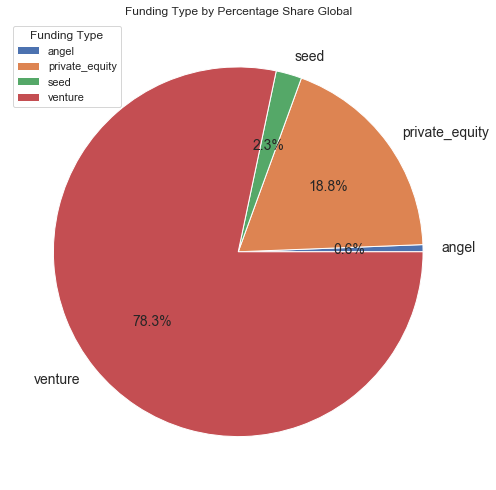

In [82]:
share_plot = fund_type_df.plot.pie(y=('raised_amount_usd','sum'),autopct='%.1f%%',legend=True,use_index=True,title='Funding Type by Percentage Share Global', textprops={'fontsize': 14}, figsize=(8.5,8.5))
share_plot.set_xlabel("")
share_plot.set_ylabel("")
share_plot.legend(title="Funding Type")

Text(-0.2, 15000000, 'Upper Limit (15 million USD)')

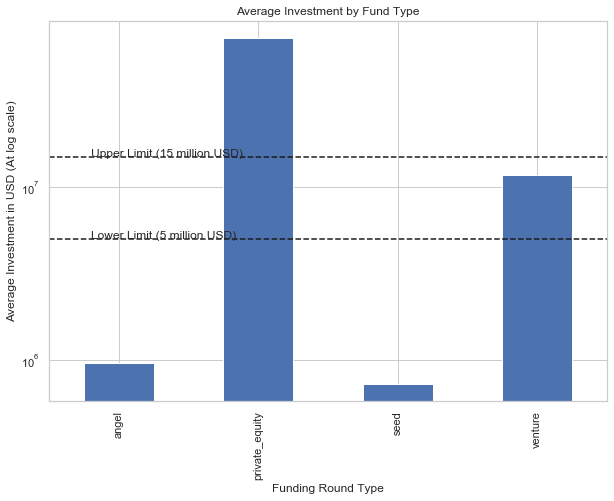

In [83]:
avg_plot = fund_type_df[[('raised_amount_usd','mean')]].plot.bar(legend=False,logy=True,title="Average Investment by Fund Type",figsize=(10,7))
avg_plot.set_xlabel("Funding Round Type")
avg_plot.set_ylabel("Average Investment in USD (At log scale)")
avg_plot.axhline( y=5000000, xmin=0, xmax=1,color='k', linestyle='--')
avg_plot.text(-0.20,5000000, "Lower Limit (5 million USD)")
avg_plot.axhline( y=15000000, xmin=0, xmax=1,color='k', linestyle='--')
avg_plot.text(-0.20,15000000, "Upper Limit (15 million USD)")

### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                

In [84]:
top9.head()
#df for checkpoint 6 question 2
c6_q2 = pd.DataFrame(index=top9.index, columns=['sum_invested','english_speaking'])
c6_q2['sum_invested'] = top9[('raised_amount_usd','sum')]
c6_q2['english_speaking'] = ['Yes','No','Yes','Yes','Yes','No','Yes','No','No']
c6_q2

,sum_invested,english_speaking
country_code,,
USA,4.336758e+11,Yes
CHN,4.506542e+10,No
GBR,2.131203e+10,Yes
IND,1.565186e+10,Yes
CAN,9.943332e+09,Yes
DEU,7.599332e+09,No
FRA,7.524737e+09,Yes
ISR,7.477515e+09,No
JPN,3.541877e+09,No


In [85]:
# resetting the index
c6_q2.reset_index(inplace=True)

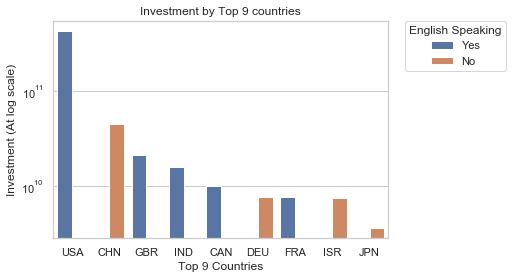

In [86]:
top9_plot = sns.barplot(x='country_code', y='sum_invested', hue='english_speaking', data=c6_q2)
plt.ylabel("Investment (At log scale)")
plt.xlabel("Top 9 Countries")
plt.title("Investment by Top 9 countries")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1),title="English Speaking", loc=2, borderaxespad=0.)
top9_plot.set_yscale("log")

### 3.A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [87]:
#adding country to df
for key,item in top_3_sector_by_company.items():
    top_3_sector_by_company[key]['country_code'] = key

In [88]:
#concatenating all top3 countries df having top 3 sectors
top_3_sector_by_country_all =  pd.concat([top_3_sector_by_company['USA'], top_3_sector_by_company['GBR'],top_3_sector_by_company['IND']],axis=0)
top_3_sector_by_country_all.head()

,main_sector,total_no_of_investment_by_sector,total_amount_invested_by_sector,country_code
2,Others,3403.0,2.858601e+10,USA
0,"Social, Finance, Analytics, Advertising",3290.0,2.668738e+10,USA
11,Cleantech / Semiconductors,2622.0,2.299343e+10,USA
12,Others,147.0,1.283624e+09,GBR
0,"Social, Finance, Analytics, Advertising",133.0,1.089404e+09,GBR


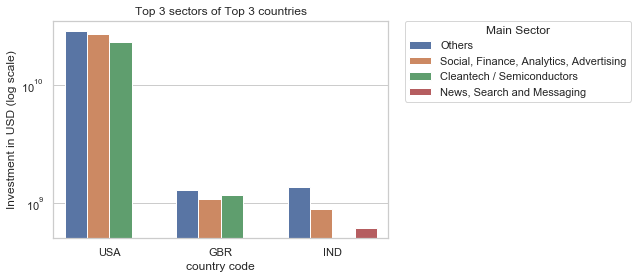

In [89]:
#Plot
top_sectors_plot = sns.barplot(x='country_code', y='total_amount_invested_by_sector', hue='main_sector', data=top_3_sector_by_country_all)
plt.ylabel('Investment in USD (log scale)')
plt.xlabel('country code')
plt.title('Top 3 sectors of Top 3 countries')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1),title="Main Sector", loc=2, borderaxespad=0.)
top_sectors_plot.set_yscale("log")

## Conclusion

#### Based on our analysis of the Investments data we can conclude the following
- Best investment type with an average size of investment in the 5-15 M USD range is <b>Venture</b> Capital.
- Top 3 English Speaking Countries receiving the highest investment amounts in Venture Capital funding types are <b>USA, Great Britain, India</b>
- The most suitable sectors for funding in the above three countries are 
    - <u>For USA and GBR:</u> <b>'Others', 'Cleantech/Semiconductors‘ and 'Social/Finance/Analytics/Advertising'</b>
    - <u>For IND:</u> <b>'Others', 'Cleantech/Semiconductors‘ and 'News, Search and Messaging'</b>